In [111]:

# Imports
import pandas as pd
import numpy as np
import math
import seaborn as sns
import scipy.stats as stats

### Gaussian Integral
We want to assess the integral of the product of two Gaussian functions.
$$\int_{-\infty}^{\infty} f(x) g(x) dx$$

$$ where $$

$$f(x) = \frac{1}{\sqrt{2 \pi \sigma_1^2}} exp({-\frac{(x - \mu_1)^2}{2 \sigma_1^2}}) \quad \& \quad g(x) = \frac{1}{\sqrt{2 \pi \sigma_2^2}} exp({-\frac{(\mu_2 - x)^2}{2 \sigma_2^2}})$$

<br></br>

However, we are not able to calculate an infinite integral with a computer. We will replace the bounds of $(-\infty,\infty)$ with a finite interval of $(a, b)$.
$$\int_{a}^{b} f(x) g(x) dx$$

We will also calculate the integral using the following method:
$$\sum_{i=1}^{N} \sqrt{\Delta{x}} f(a + i \Delta{x}) * \sqrt{\Delta{x}} g(a + i \Delta{x})$$

In [112]:
# Defines the Integration parameters
bounds = (-5, 5)
N = 100
delta = (bounds[1] - bounds[0]) / N

# Defines the Gaussian parameters
mu1 = 0
mu2 = 1
sig1 = 1
sig2 = 1

In [113]:
# First Gaussian Function
def f(x, mu1=mu1, sig1=sig1):
    return (1 / (math.sqrt(2 * math.pi) * sig1)) * math.exp((-1 * ((mu1 - x) ** 2)) / (2 * (sig1 ** 2)))

In [114]:
# Second Gaussian Function
def g(x, mu2=mu2, sig2=sig2):
    return (1 / (math.sqrt(2 * math.pi) * sig2)) * math.exp((-1 * ((x - mu2) ** 2)) / (2 * (sig2 ** 2)))

In [115]:
# Creates the two matrixes Ai and Bi
Ai = np.vectorize(f)(np.arange(bounds[0], bounds[1] + delta, delta))
Bi = np.vectorize(g)(np.arange(bounds[0], bounds[1] + delta, delta))

# Scales the matrixes
Ai *= math.sqrt(delta)
Bi *= math.sqrt(delta)

In [116]:
# Dot product of the matrixes
np.matmul(Ai, Bi)

0.21969564472073824

### Visualizing Gaussian Curves

Below displays the gaussian curves that we are currently calculating the product of.

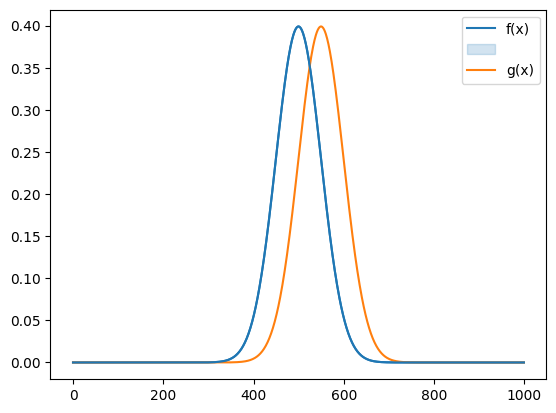

In [117]:
# Visualization of the two curves
def norm_dis():
    x = np.linspace(-10, 10, 1000)
    y1 = stats.norm.pdf(x, loc=mu1, scale=sig1)
    y2 = stats.norm.pdf(x, loc=mu2, scale=sig2)
    plt = sns.lineplot(y1)
    plt.add_line(sns.lineplot(y2).lines[0])
    plt.legend(['f(x)', '', 'g(x)'])

norm_dis()

### Adjusting N

To find the value of the integral, with the bounds of $(-5, 5)$, we will adjust the number of points used to calculate the integral meaning adjusting the value of $N$ and plotting the results to visualize if the integral converges to a solution as N increases.

In [118]:
# Calculates product between two gaussian curves
def gauss_product(mu1=mu1, mu2=mu2, sig1=sig1, sig2=sig2, a=bounds[0], b=bounds[1], N=N):
    # Calculates new delta
    delta = (b - a) / N
    
    # Creates the two matrixes Ai and Bi
    Ai = np.vectorize(f)(np.arange(a, b + delta, delta), mu1=mu1, sig1=sig1)
    Bi = np.vectorize(g)(np.arange(a, b + delta, delta), mu2=mu2, sig2=sig2)
    
    # Scales the matrixes
    Ai *= math.sqrt(delta)
    Bi *= math.sqrt(delta)
    
    return np.matmul(Ai, Bi)

The integral is approximately 0.2196956447208079


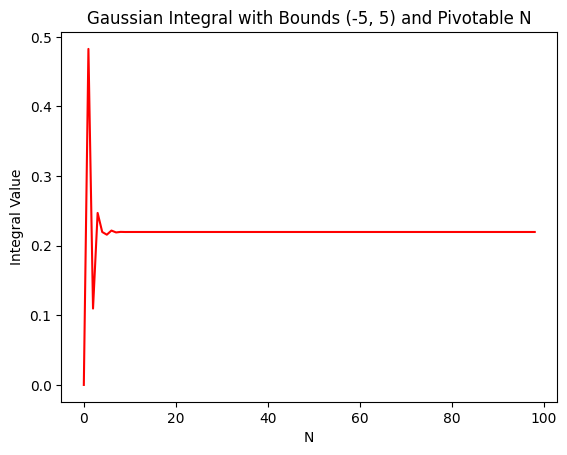

In [119]:
res = np.vectorize(gauss_product)(N=np.arange(1, 100, 1))

# Plots the results
plt = sns.lineplot(res)
plt.set_title('Gaussian Integral with Bounds (-5, 5) and Pivotable N')
plt.set_xlabel('N')
plt.set_ylabel('Integral Value')
plt.lines[0].set_color('red')

print('The integral is approximately', res[-1])

### Trying Different Bounds

We want to see how different bounds of the integral affect the resulting product because if we recall, we are using fixed bounds but our main integral is from $(-\infty, \infty)$.

The integral for bounds (-5, 5) is approximately 0.2196956447208079
The integral for bounds (-10, 10) is approximately 0.21969564473386075
The integral for bounds (-100, 100) is approximately 0.21905324859376046


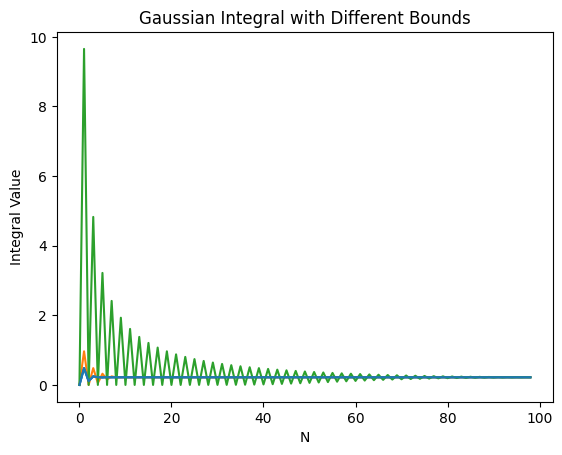

In [120]:
# Lets Increase the Bounds to (-10, 10) and (-100, 100) and see what happens
res2 = np.vectorize(gauss_product)(N=np.arange(1, 100, 1), a=-10, b=10)
res3 = np.vectorize(gauss_product)(N=np.arange(1, 100, 1), a=-100, b=100)

# Plots the results
plt = sns.lineplot(res)
plt.add_line(sns.lineplot(res2).lines[0])
plt.add_line(sns.lineplot(res3).lines[0])

plt.set_title('Gaussian Integral with Different Bounds')
plt.set_xlabel('N')
plt.set_ylabel('Integral Value')

print('The integral for bounds (-5, 5) is approximately', res[-1])
print('The integral for bounds (-10, 10) is approximately', res2[-1])
print('The integral for bounds (-100, 100) is approximately', res3[-1])

### Adjusting Gaussian Parameters
No matter the bounds, the results converges to a number close to $0.21969$ because bigger bounds mostly dealt with the outliers which get smaller the further the bounds increase. The current assumption I am making from logical deduction is that the larger the sigma gets, the bigger the bounds we will need to make to converge to a more realistic solution. When we increase bounds, we need to make sure to increase the N parameter because larger bounds took much longer to converge to the solution as shown from the analysis above.

Here we will begin by adjusting $\mu_1$ and then adjust $\mu_2$ to see how it affects the product. This is our main goal from this integral but after this is done for further analysis, we want to see how $\sigma_1$ and $\sigma_2$ affect the results.

Text(0, 0.5, 'Integral Value')

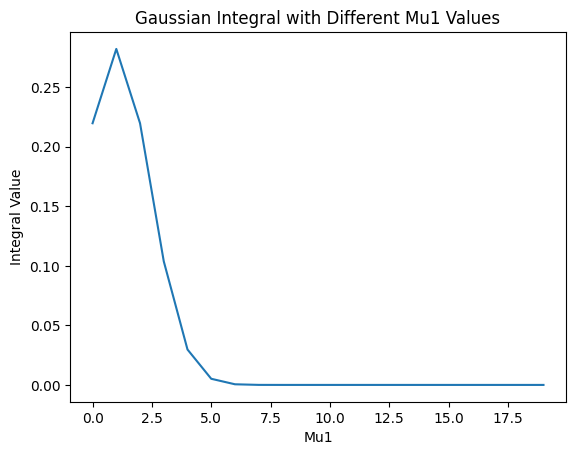

In [121]:
res_mu1 = np.vectorize(gauss_product)(mu1=np.arange(0, 20, 1))

plt = sns.lineplot(res_mu1)

plt.set_title('Gaussian Integral with Different Mu1 Values')
plt.set_xlabel('Mu1')
plt.set_ylabel('Integral Value')

Text(0, 0.5, 'Integral Value')

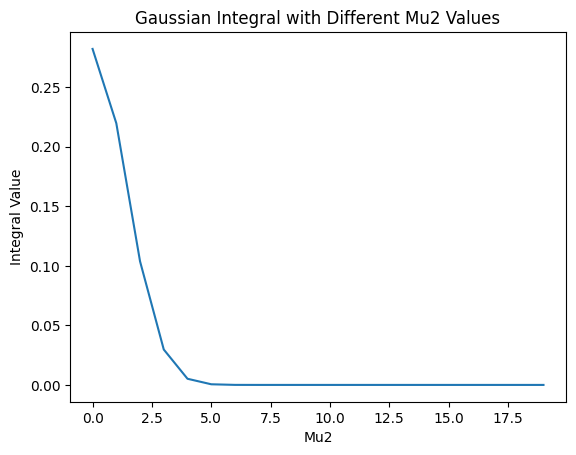

In [122]:
res_mu2 = np.vectorize(gauss_product)(mu2=np.arange(0, 20, 1))

plt = sns.lineplot(res_mu2)

plt.set_title('Gaussian Integral with Different Mu2 Values')
plt.set_xlabel('Mu2')
plt.set_ylabel('Integral Value')

Text(0, 0.5, 'Integral Value')

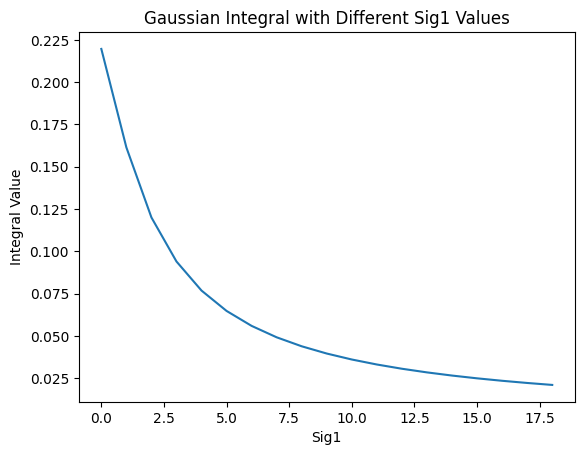

In [123]:
res_sig1 = np.vectorize(gauss_product)(sig1=np.arange(1, 20, 1))

plt = sns.lineplot(res_sig1)

plt.set_title('Gaussian Integral with Different Sig1 Values')
plt.set_xlabel('Sig1')
plt.set_ylabel('Integral Value')

Text(0, 0.5, 'Integral Value')

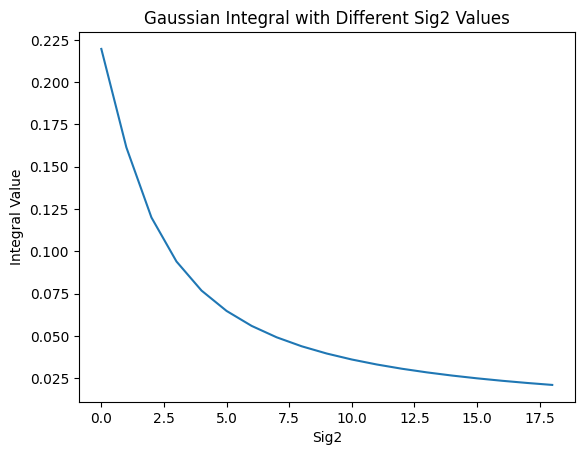

In [124]:
res_sig2 = np.vectorize(gauss_product)(sig2=np.arange(1, 20, 1))

plt = sns.lineplot(res_sig2)

plt.set_title('Gaussian Integral with Different Sig2 Values')
plt.set_xlabel('Sig2')
plt.set_ylabel('Integral Value')

Text(0, 0.5, 'Integral Value')

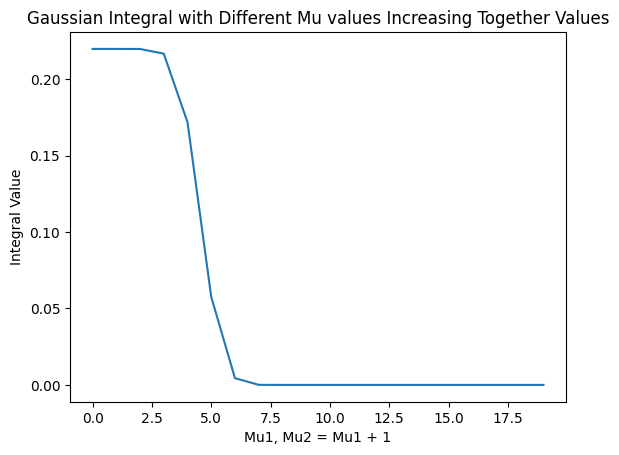

In [125]:
res_muboth = np.vectorize(gauss_product)(mu1=np.arange(0, 20, 1), mu2=np.arange(1, 21, 1))

plt = sns.lineplot(res_muboth)

plt.set_title('Gaussian Integral with Different Mu values Increasing Together Values')
plt.set_xlabel('Mu1, Mu2 = Mu1 + 1')
plt.set_ylabel('Integral Value')

### Conclusion

From the results above, we can assess that as mu or sigma get bigger, the integral value gets smaller.